# The difference between confidence Intervals and prediction intervals

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

As part of the assignment on human body temperature, there is a question about using observations of body temperature to come up with a way of determining if a persons body temperature is "abnormal". The question additionally suggests that the students begin with computing a margin of error and confidence interval (CI). I've seen several students post code that seems to be using a CI for the population mean body temperature and declaring that temperatures out side this range are "abnormal". I don't think this is right. The problem is that the mean characterizes the center of the population distribution, but determining when a person is "abnormal" is a characteristic of the individual temperatures. As a result, using the CI for the population mean produces intervals that are too narrow. Instead a [reference range](https://en.wikipedia.org/wiki/Reference_range)  can be constructed using a [prediction interval](https://en.wikipedia.org/wiki/Prediction_interval#Unknown_mean.2C_unknown_variance).

## Using a CI results in intervals that are too narrow  
  
First, I calculate a t-based CI for the population mean:

In [2]:
# t-based confidence interval
crit_t = sp.stats.t.ppf(0.975, len(df.temperature) - 1)
temp_sem = df.temperature.std()/(np.sqrt(len(df.temperature)))
ci_width = crit_t * temp_sem
ci_upper_lim = df.temperature.mean() + ci_width
ci_lower_lim = df.temperature.mean() - ci_width
[ci_lower_lim, ci_upper_lim]

[98.122002905608042, 98.376458632853513]

Let's look at this interval overlayed in black on a histogram of the acutal data:

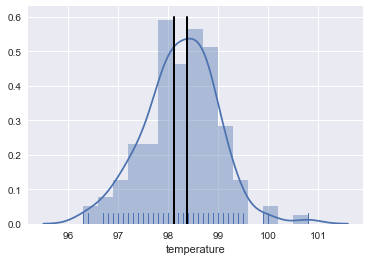

In [3]:
sb.distplot(df.temperature, bins = 15, rug = True)
plt.plot([ci_lower_lim, ci_lower_lim], [0.6, 0], linewidth = 2, color = "k")
plt.plot([ci_upper_lim, ci_upper_lim], [0.6, 0], linewidth = 2, color = "k")

I also calculate the propotion of the data that lies outside the interval:

In [4]:
temp_below_ci = len(df.temperature[df.temperature < ci_lower_lim])
temp_above_ci = len(df.temperature[df.temperature > ci_upper_lim])
percent_outside_ci = (temp_below_ci + temp_above_ci)/len(df.temperature)
percent_outside_ci

0.8846153846153846

The interval is intended to be interpreted as identifying "abnormal" temperatures based on the fact that they are outside the interval, and yet the majority of the temperatures that this interval is calculated on are outside of it, a strange property if temperatures outside are "abnormal".

The width of a CI for the population mean is a multiple of $s/\sqrt{n}$ for the sample standard deviation s and sample size n. As n increases, this width becomes smaller and smaller. This makes sense for a CI for the mean, but not when constructing an interval that is used to determine if an individual is normal or abnormal. Imagine that we knew for a fact that temperatures where generated from a specific distribution, say normal with a mean of 98 and a standard deviation of 1. As we collect more and more data, we expect our estimated mean to converge to 98, and the CI width to shrink as the sample mean becomes an arbitrarily good approximation of the population one. For the mean, the only source of uncertainty is due to our sampling. If we knew the population mean value, we could just state that it equals that value, with no uncertainty. We use the interval to represent the uncertainty due to using the sample mean as an estimator of the population mean.  
  
When considering whether certain temperatures are normal or abnormal there are two sources of uncertainty/variability. There is uncertainty from sampling, but there is also inherent randomness in the population. Even if we knew the exact population distributions was normal with mean 98 and standard deviation 1, we would still need an interval to tell us what is normal or abnormal. For example, we could use 98 +/- 4, since most of the popability of a normal distrubtion resides with 2 standard deviations of its mean. When we use a sample rather than simply knowing the population distribution, our interval should be **wider** to account for the uncertainty due to sampling. The CI for the population mean does not meet this requirement, since it's width can be arbrarily small as the sample size increases, and can therefore be systematically narrower than 2 times the population standard deviation. 

## Prediction intervals for a range of normal values  
  
Instead of using CIs for the population mean, we can use a [prediction interval (PI)](https://en.wikipedia.org/wiki/Prediction_interval#Unknown_mean.2C_unknown_variance). The width of this interval is a multiple of $s * \sqrt{1 + 1/n}$, which approximates the population standard deviation for large n rather than shrinking to zero. This is sensible, since as we said above, mean +/- a multiple of the population standard deviation is a reasonable interval if we knew the population distribution. Since the sample standard deviation approximates the population one, and is a good approximation at large sample sizes, this behavior at large samples is preferable to that of the CI for the population mean. below, I perform the analyses as above with the PI instead of the CI, showing that it produces much more reasonable results on the sample of temperature measurements:

In [5]:
# t-based prediction interval
pi_width = crit_t * df.temperature.std() * np.sqrt((1 + 1/(len(df.temperature))))
pi_upper_lim = df.temperature.mean() + pi_width
pi_lower_lim = df.temperature.mean() - pi_width
[pi_lower_lim, pi_upper_lim]

[96.793041311796571, 99.705420226664984]

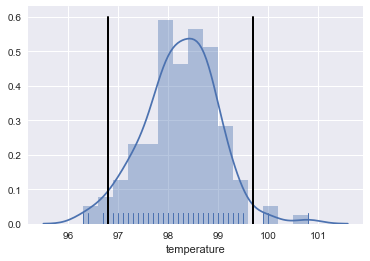

In [6]:
sb.distplot(df.temperature, bins = 15, rug = True)
plt.plot([pi_lower_lim, pi_lower_lim], [0.6, 0], linewidth = 2, color = "k")
plt.plot([pi_upper_lim, pi_upper_lim], [0.6, 0], linewidth = 2, color = "k")

In [7]:
temp_below_pi = len(df.temperature[df.temperature < pi_lower_lim])
temp_above_pi = len(df.temperature[df.temperature > pi_upper_lim])
percent_outside_pi = (temp_below_pi + temp_above_pi)/len(df.temperature)
percent_outside_pi

0.05384615384615385